# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))
print(x.shape, y.shape, feature.shape)
print(feature.dtype)

number of data : 1000
number of feature : 2
(1000,) (1000,) (1000, 2)
float64


## plot the input data

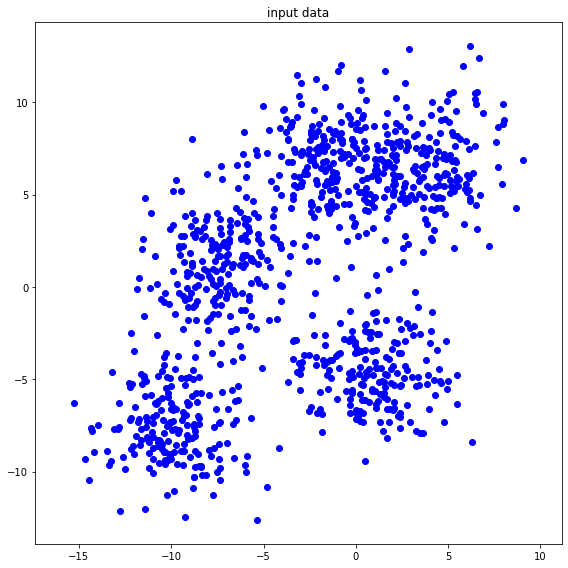

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x,y, 'o', color = 'blue')
plt.axis('equal')

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [4]:
def compute_distance(feature, center):
    # data here has (1000,2) shape,   center.shape should be (1,2) shape or (2,)
    data_num = np.size(feature,0)
    center_ = center.reshape(1,2)

    # feature.shape = (1000,2)
    distance = feature - center_
    distance = distance**2
    distance = np.sum(distance, axis = 1).reshape(data_num,1)
    distance = distance** (0.5)
    
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [5]:
def compute_centroid(feature, label_feature, value_label):
    data_num = feature.shape[0]
    m = feature.shape[1]
    # label_temp.shape = (n,1)
    label_temp = label_feature - value_label
    # temp_4_xor.shape = (n,1)
    temp_4_xor = np.ones((data_num,1))
    # In label_temp, only zeros convert to True
    only_selected_label = np.logical_xor(label_temp, temp_4_xor).reshape((data_num,1))
    # True element count
    true_count = np.sum( only_selected_label)
    
    cen = feature * only_selected_label
    cen = np.sum(cen, axis = 0) // true_count
    cen = cen.reshape((1,m))
    
    # now we have to pick a dot which is the most close dot from the cen
    
    close_dot = feature - cen
    close_dot = close_dot ** 2
  
    close_dot = np.sum(close_dot, axis = 1)
    

    min_idx = np.argmin(close_dot)

    centroid = feature[min_idx].reshape((1,m))
  
    
    
       
            
    
    
    
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [6]:
def compute_label(distance):
    data_num = distance.shape[0]
    result = []
    
    for i in range(data_num):
        result.append(np.argmin(i))
    index_label_feature = np.array(result).reshape((data_num,1))
    
    return index_label_feature


In [7]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 1000
label_cluster = [0,1,2,3,4]
# Initial clustering (1000,1)
label_feature = np.array([0]*number_data).reshape(number_data, 1)
label_feature[200:400] = 1
label_feature[400:600] = 2
label_feature[600:800] = 3
label_feature[800:1000] = 4
# ===================================================
#compute_distance(feature, center)  ==> n x 1
#compute_centroid(feature, label_feature, value_label) ==> 1 x m
#compute_label(distance) n x k ==> n x 1

In [8]:
#(1000,5)
distance            = np.zeros(shape=(number_data, number_cluster))
#(5,2)
centroid            = np.zeros(shape=(number_cluster, number_feature))
#(50000, 1)
loss_iteration      = np.zeros(shape=(number_iteration, 1))
#(50000,5,2)
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))


for i in range(number_iteration):
    
    for k in range(len(label_cluster)):
        # now_centroid.shape = (1,2)
        now_centroid = compute_centroid(feature, label_feature, label_cluster[k])
        # save
        centroid[k] = now_centroid
        
        
        distance[:,k] = compute_distance(feature, now_centroid).reshape(number_data,)
        
    #update label_feature
    label_feature = compute_label(distance)
    #update cetroid_iteration
    centroid_iteration[i] = centroid
    
    # update loss
    loss = 0
    for j in range(len(distance)):
        loss += min(distance[j]) ** 2
    loss /= number_data
    
    # save loss_iteration
    loss_iteration[i] = loss
    print("iterrrr", i," = ",loss)

iterrrr 0  =  51.80849575349316
iterrrr 1  =  49.573575726682996
iterrrr 2  =  49.573575726682996
iterrrr 3  =  49.573575726682996
iterrrr 4  =  49.573575726682996
iterrrr 5  =  49.573575726682996
iterrrr 6  =  49.573575726682996
iterrrr 7  =  49.573575726682996
iterrrr 8  =  49.573575726682996
iterrrr 9  =  49.573575726682996
iterrrr 10  =  49.573575726682996
iterrrr 11  =  49.573575726682996
iterrrr 12  =  49.573575726682996
iterrrr 13  =  49.573575726682996
iterrrr 14  =  49.573575726682996
iterrrr 15  =  49.573575726682996
iterrrr 16  =  49.573575726682996
iterrrr 17  =  49.573575726682996
iterrrr 18  =  49.573575726682996
iterrrr 19  =  49.573575726682996
iterrrr 20  =  49.573575726682996
iterrrr 21  =  49.573575726682996
iterrrr 22  =  49.573575726682996
iterrrr 23  =  49.573575726682996
iterrrr 24  =  49.573575726682996
iterrrr 25  =  49.573575726682996
iterrrr 26  =  49.573575726682996
iterrrr 27  =  49.573575726682996
iterrrr 28  =  49.573575726682996
iterrrr 29  =  49.5735757

iterrrr 259  =  49.573575726682996
iterrrr 260  =  49.573575726682996
iterrrr 261  =  49.573575726682996
iterrrr 262  =  49.573575726682996
iterrrr 263  =  49.573575726682996
iterrrr 264  =  49.573575726682996
iterrrr 265  =  49.573575726682996
iterrrr 266  =  49.573575726682996
iterrrr 267  =  49.573575726682996
iterrrr 268  =  49.573575726682996
iterrrr 269  =  49.573575726682996
iterrrr 270  =  49.573575726682996
iterrrr 271  =  49.573575726682996
iterrrr 272  =  49.573575726682996
iterrrr 273  =  49.573575726682996
iterrrr 274  =  49.573575726682996
iterrrr 275  =  49.573575726682996
iterrrr 276  =  49.573575726682996
iterrrr 277  =  49.573575726682996
iterrrr 278  =  49.573575726682996
iterrrr 279  =  49.573575726682996
iterrrr 280  =  49.573575726682996
iterrrr 281  =  49.573575726682996
iterrrr 282  =  49.573575726682996
iterrrr 283  =  49.573575726682996
iterrrr 284  =  49.573575726682996
iterrrr 285  =  49.573575726682996
iterrrr 286  =  49.573575726682996
iterrrr 287  =  49.5

iterrrr 526  =  49.573575726682996
iterrrr 527  =  49.573575726682996
iterrrr 528  =  49.573575726682996
iterrrr 529  =  49.573575726682996
iterrrr 530  =  49.573575726682996
iterrrr 531  =  49.573575726682996
iterrrr 532  =  49.573575726682996
iterrrr 533  =  49.573575726682996
iterrrr 534  =  49.573575726682996
iterrrr 535  =  49.573575726682996
iterrrr 536  =  49.573575726682996
iterrrr 537  =  49.573575726682996
iterrrr 538  =  49.573575726682996
iterrrr 539  =  49.573575726682996
iterrrr 540  =  49.573575726682996
iterrrr 541  =  49.573575726682996
iterrrr 542  =  49.573575726682996
iterrrr 543  =  49.573575726682996
iterrrr 544  =  49.573575726682996
iterrrr 545  =  49.573575726682996
iterrrr 546  =  49.573575726682996
iterrrr 547  =  49.573575726682996
iterrrr 548  =  49.573575726682996
iterrrr 549  =  49.573575726682996
iterrrr 550  =  49.573575726682996
iterrrr 551  =  49.573575726682996
iterrrr 552  =  49.573575726682996
iterrrr 553  =  49.573575726682996
iterrrr 554  =  49.5

iterrrr 785  =  49.573575726682996
iterrrr 786  =  49.573575726682996
iterrrr 787  =  49.573575726682996
iterrrr 788  =  49.573575726682996
iterrrr 789  =  49.573575726682996
iterrrr 790  =  49.573575726682996
iterrrr 791  =  49.573575726682996
iterrrr 792  =  49.573575726682996
iterrrr 793  =  49.573575726682996
iterrrr 794  =  49.573575726682996
iterrrr 795  =  49.573575726682996
iterrrr 796  =  49.573575726682996
iterrrr 797  =  49.573575726682996
iterrrr 798  =  49.573575726682996
iterrrr 799  =  49.573575726682996
iterrrr 800  =  49.573575726682996
iterrrr 801  =  49.573575726682996
iterrrr 802  =  49.573575726682996
iterrrr 803  =  49.573575726682996
iterrrr 804  =  49.573575726682996
iterrrr 805  =  49.573575726682996
iterrrr 806  =  49.573575726682996
iterrrr 807  =  49.573575726682996
iterrrr 808  =  49.573575726682996
iterrrr 809  =  49.573575726682996
iterrrr 810  =  49.573575726682996
iterrrr 811  =  49.573575726682996
iterrrr 812  =  49.573575726682996
iterrrr 813  =  49.5

## plot the results

In [9]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
  

    plt.plot(x,y, 'o', color = 'blue')

    plt.tight_layout()
    plt.show()

In [10]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
   
    plt.plot(np.arange(1,number_iteration+1), loss_iteration, '-', color = 'red')
    plt.xlabel('iteration') 
    plt.ylabel('loss')
    plt.tight_layout() 
    plt.show()

In [60]:

def plot_centroid(centroid_iteration):
    # centroid_iteration.shape = (number_itaration, number_cluster, 2)
    num_iter = centroid_iteration.shape[0]
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    
    
    
    
    
    initial_x, initial_y = centroid_iteration[0][:,0], centroid_iteration[0][:,1]
    final_x, final_y = centroid_iteration[num_iter-1][:,0], centroid_iteration[num_iter-1][:,1]
    
    now_x = []
    now_y = []
    
    for i in range(centroid_iteration.shape[1]):
        now_x = centroid_iteration[:,i,0]
        now_y = centroid_iteration[:,i,1]
        # now_x, now_y. shape = (number_iteration, ) 
        plt.plot(now_x, now_y,'-',color= 'C'+str(i), label = 'cluster = '+str(i))
        
    
    
    
    
    
    
    
    plt.plot(initial_x, initial_y, 'o', color = 'blue', label='initial')
    plt.plot(final_x, final_y, 's', color = 'red', label='final')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [62]:
def plot_cluster(feature, label_feature, label_cluster):
    # feature (1000,2)
    # label_feature (1000, 1)
    # label_cluster is list, len = number_cluster
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    
    
    now_x = []
    now_y = []
    
    for i in range(len(label_cluster)):
        now_x=[]
        now_y=[]
        for j in range(label_feature.shape[0]):
            if label_feature[j][0] == label_cluster[i]:
                now_x.append(feature[j][0])
                now_y.append(feature[j][1])
        plt.plot(now_x, now_y,'o',color= 'C'+str(i+1), label = 'cluster_'+str(i))
        
                
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

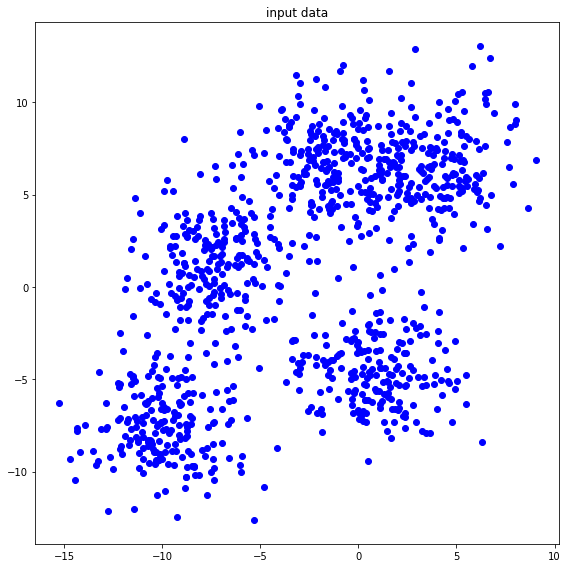

In [63]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

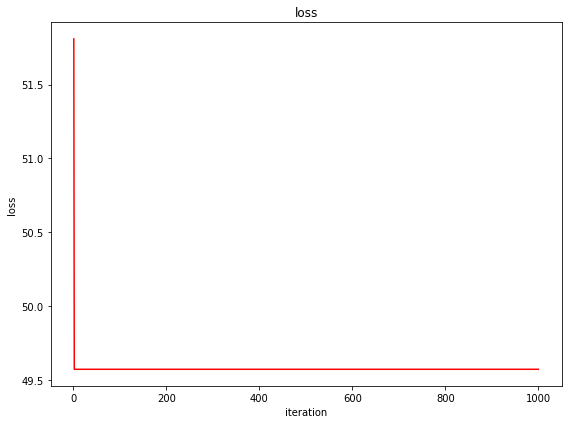

In [64]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

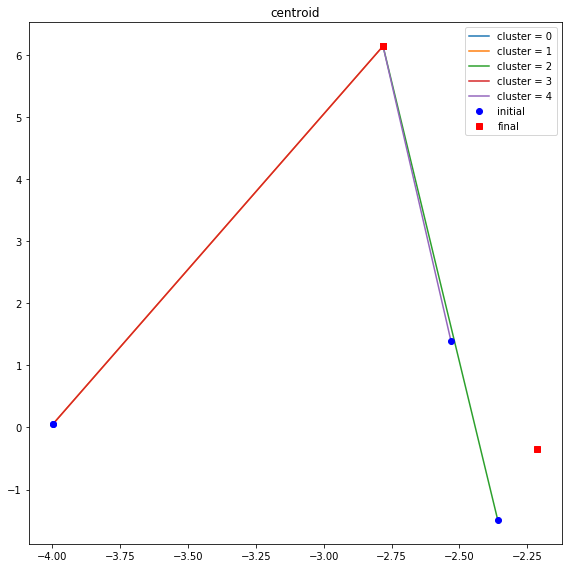

In [65]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

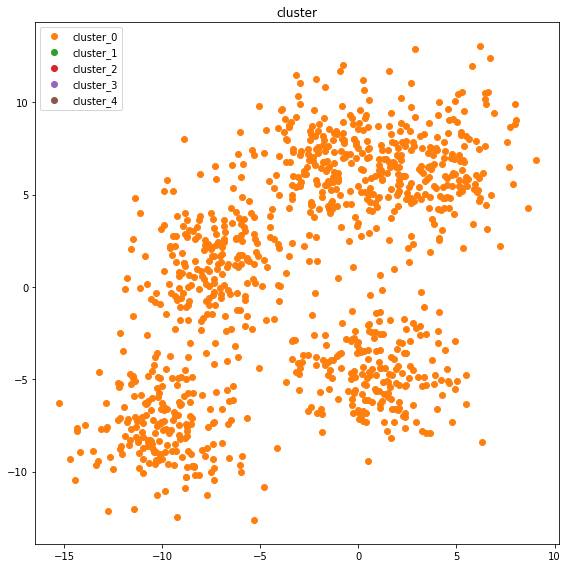

In [66]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

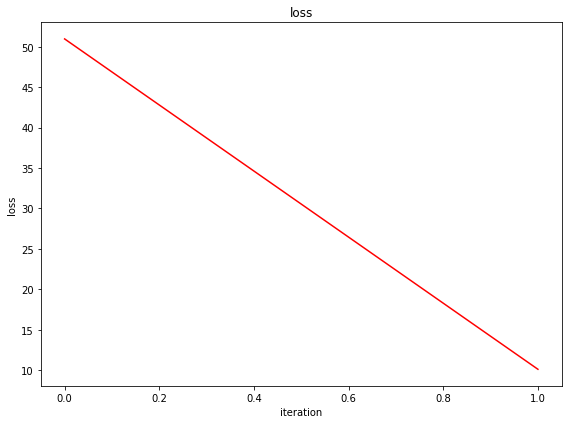

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

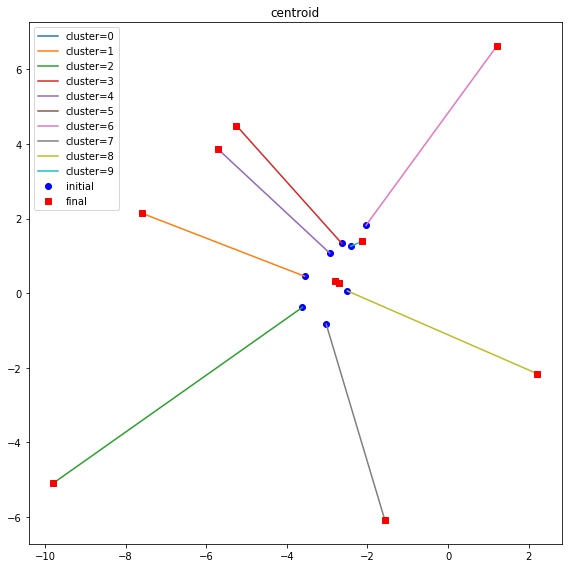

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

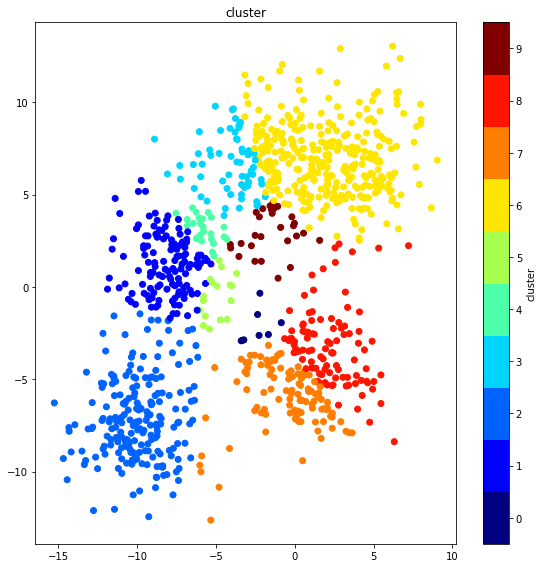

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***